**Por Marianna Massi**

## Transtorno do Espectro do Autista (TEA) na Educação

O **transtorno do espectro autista (TEA)** é um transtorno relacionado ao desenvolvimento neurológico. Sua caracterização é feita pelos sinais e sintomas apresentados pela pessoa, que compreendem dificuldade em se comunicar, dificuldade de interação social e por interesses ou movimentos repetidos realizados pela pessoa.

O TEA possui 4 tipos e 3 níveis diferentes, essa análise será simplificada e generalizada em detrimento da falta de dados o suficiente para o aprofundamento.

Para saber mais: https://blog.psicologiaviva.com.br/tipos-de-autismo/

##Import

In [ ]:
import pandas as pd
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
tea = dados.query("IN_AUTISMO == 1")
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)

dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5


##Quantos cidadãos com TEA existem no Brasil?

["Estima-se que o Brasil, com 200 milhões de habitantes, possua cerca de dois milhões de autistas. A síndrome tem, pouco a pouco, saído da obscuridade, mas o estigma e o preconceito, porém, ainda são alguns dos desafios de quem convive de perto com o problema."](http://www.usp.br/espacoaberto/?materia=um-retrato-do-autismo-no-brasil)

Text(0.5, 1.0, 'Cidadãos brasileiros com e sem TEA')

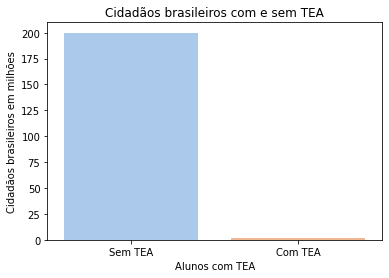

In [ ]:
sns.barplot(x=['Sem TEA', 'Com TEA'], y=[200, 2], palette="pastel")
plt.xlabel("Alunos com TEA")
plt.ylabel("Cidadãos brasileiros em milhões")
plt.title("Cidadãos brasileiros com e sem TEA")

Apesar de dados limitados, o Censo Escolar mostra que **o número de alunos com autismo que estão matriculados em classes comuns no Brasil aumentou 37,27% entre os anos de 2017 (77.102) e 2018 (105.842).**


Text(0.5, 1.0, 'Alunos com TEA matriculados em classes comuns no Brasil')

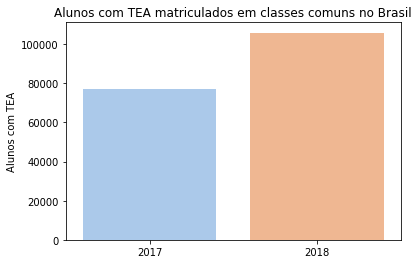

In [ ]:
sns.barplot(x=['2017', '2018'], y=[77102, 105842], palette="pastel")
plt.ylabel("Alunos com TEA")
plt.title("Alunos com TEA matriculados em classes comuns no Brasil")

##Onde os candidatos com TEA estudam?

**Se aumentou cerca de 37% dos alunos com TEA em escola de ensino regular em 2018, quanto isso refletiu no ENEM de 2019?**

In [ ]:
dados.query("TP_ENSINO == 2").value_counts()

NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA  NO_MUNICIPIO_RESIDENCIA   CO_UF_RESIDENCIA  SG_UF_RESIDENCIA  NU_IDADE  TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  TP_NACIONALIDADE  CO_MUNICIPIO_NASCIMENTO  NO_MUNICIPIO_NASCIMENTO   CO_UF_NASCIMENTO  SG_UF_NASCIMENTO  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  CO_ESCOLA   CO_MUNICIPIO_ESC  NO_MUNICIPIO_ESC         CO_UF_ESC  SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  IN_BAIXA_VISAO  IN_CEGUEIRA  IN_SURDEZ  IN_DEFICIENCIA_AUDITIVA  IN_SURDO_CEGUEIRA  IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_MENTAL  IN_DEFICIT_ATENCAO  IN_DISLEXIA  IN_DISCALCULIA  IN_AUTISMO  IN_VISAO_MONOCULAR  IN_OUTRA_DEF  IN_GESTANTE  IN_LACTANTE  IN_IDOSO  IN_ESTUDA_CLASSE_HOSPITALAR  IN_SEM_RECURSO  IN_BRAILLE  IN_AMPLIADA_24  IN_AMPLIADA_18  IN_LEDOR  IN_ACESSO  IN_TRANSCRICAO  IN_LIBRAS  IN_TEMPO_ADICIONAL  IN_LEITURA_LABIAL  IN_MESA_CADEIRA_RODAS  IN_MESA_CADEIRA_SEPARADA  IN_APOIO_PERNA  IN_GUIA_INTERPRETE  IN_COMP

In [ ]:
renomear = {1:"Regular"}
dados.query("IN_AUTISMO == 1")["TP_ENSINO"].value_counts().rename(index = renomear).sort_index().rename_axis(['IN_AUTISMO']).reset_index(name = 'Total')

,IN_AUTISMO,Total
0,Regular,15


**Todos os candidatos** que responderam estudaram em **ensino regular.**

In [ ]:
renomear = {1:"Não informado", 2:"Pública", 3:"Particular"}
dados.query("IN_AUTISMO == 1")["TP_ESCOLA"].value_counts().rename(index = renomear).sort_index().rename_axis(['IN_AUTISMO']).reset_index(name = 'Total')


,IN_AUTISMO,Total
0,Não informado,20
1,Particular,4
2,Pública,5


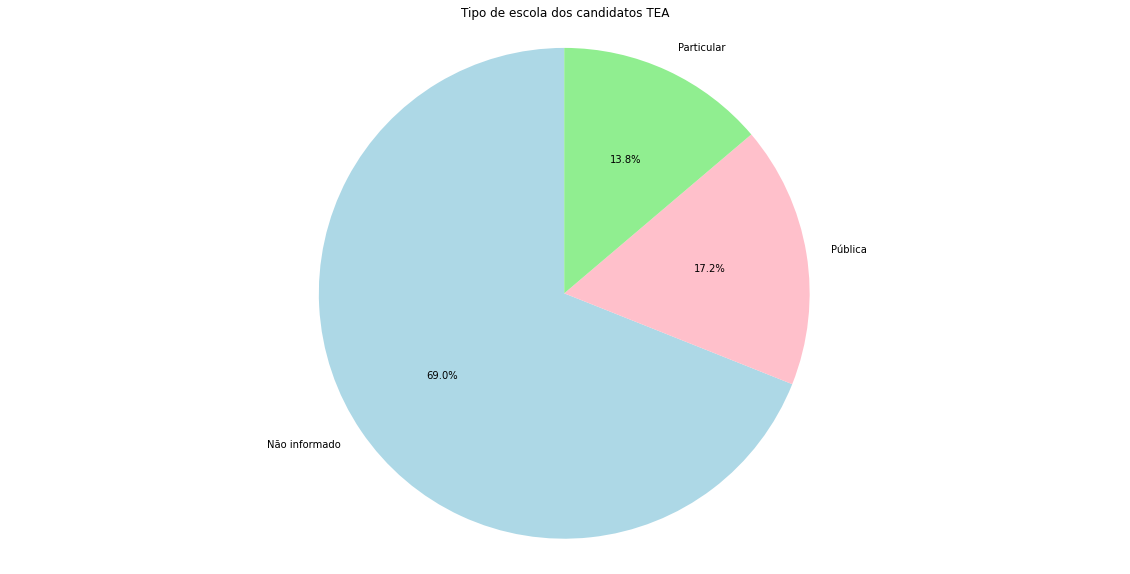

In [ ]:
ensino1 = tea["TP_ESCOLA"].value_counts(normalize=True).index
ensino2 = tea["TP_ESCOLA"].value_counts(normalize=True).values

fig1, ax1 = plt.subplots(figsize=(20, 10))
ax1.pie(ensino2, labels=['Não informado', 'Pública', 'Particular'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink', 'lightgreen'])
ax1.axis('equal') 
plt.title("Tipo de escola dos candidatos TEA")
plt.show()

##Quantos candidatos possuem TEA?

São **29 candidatos com TEA** de 127.380 candidatos no ENEM 2019, representando apenas **0,02276653%** (ou 0,002%) do total.

In [ ]:
renomear = {0:"Sem TEA", 1:"Com TEA"}
 
dados['IN_AUTISMO'].value_counts().rename(index = renomear).sort_index().rename_axis(['IN_AUTISMO']).reset_index(name = 'Total')

,IN_AUTISMO,Total
0,Com TEA,29
1,Sem TEA,127351


In [ ]:
dados.query("IN_AUTISMO == 1").value_counts()

NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA  NO_MUNICIPIO_RESIDENCIA  CO_UF_RESIDENCIA  SG_UF_RESIDENCIA  NU_IDADE  TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  TP_NACIONALIDADE  CO_MUNICIPIO_NASCIMENTO  NO_MUNICIPIO_NASCIMENTO  CO_UF_NASCIMENTO  SG_UF_NASCIMENTO  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  CO_ESCOLA   CO_MUNICIPIO_ESC  NO_MUNICIPIO_ESC       CO_UF_ESC  SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  IN_BAIXA_VISAO  IN_CEGUEIRA  IN_SURDEZ  IN_DEFICIENCIA_AUDITIVA  IN_SURDO_CEGUEIRA  IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_MENTAL  IN_DEFICIT_ATENCAO  IN_DISLEXIA  IN_DISCALCULIA  IN_AUTISMO  IN_VISAO_MONOCULAR  IN_OUTRA_DEF  IN_GESTANTE  IN_LACTANTE  IN_IDOSO  IN_ESTUDA_CLASSE_HOSPITALAR  IN_SEM_RECURSO  IN_BRAILLE  IN_AMPLIADA_24  IN_AMPLIADA_18  IN_LEDOR  IN_ACESSO  IN_TRANSCRICAO  IN_LIBRAS  IN_TEMPO_ADICIONAL  IN_LEITURA_LABIAL  IN_MESA_CADEIRA_RODAS  IN_MESA_CADEIRA_SEPARADA  IN_APOIO_PERNA  IN_GUIA_INTERPRETE  IN_COMPUTAD

**Apenas 29 de 2 milhões de Brasileiros foram candidatos no ENEM 2019.** O número é tão pequeno que se torna impossível de visualizá-lo no gráfico.

Text(0.5, 1.0, 'Cidadãos brasileiros com TEA vs Candidatos com TEA no ENEM 2019')

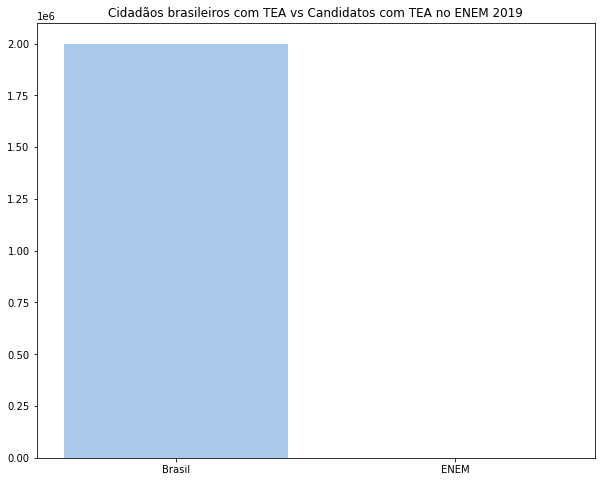

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=['Brasil', 'ENEM'], y=[2000000, 29], palette="pastel")
plt.title("Cidadãos brasileiros com TEA vs Candidatos com TEA no ENEM 2019")

##Quantos candidatos com TEA são treineiros?

Cerca de **90%** dos candidados com TEA **não são treineiros**.

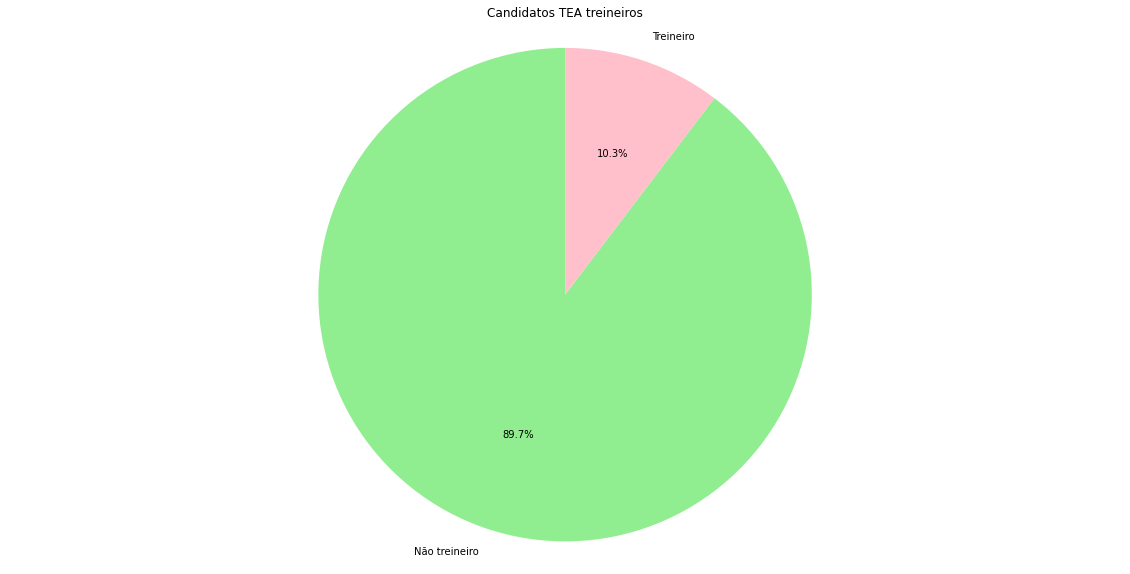

In [ ]:
treineiros = tea["IN_TREINEIRO"].value_counts(normalize=True).index
treineiros = tea["IN_TREINEIRO"].value_counts(normalize=True).values

fig1, ax1 = plt.subplots(figsize=(20, 10))
ax1.pie(s, labels=['Não treineiro', 'Treineiro'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'pink'])

ax1.axis('equal') 

plt.title("Candidatos TEA treineiros")
plt.show()

##Quais são as notas dos candidatos com TEA?

Se **a maioria dos candidatos estudou em ensino regular**, no que isso se refletiu em sua nota total?

In [ ]:
dados.query("IN_AUTISMO == 1")["NU_NOTA_TOTAL"].value_counts()

0.0       2
3678.2    1
2992.7    1
2497.3    1
2558.0    1
3502.0    1
2684.4    1
2880.7    1
3106.6    1
3145.4    1
1889.2    1
1758.1    1
2399.7    1
2094.3    1
2351.3    1
2561.1    1
3116.4    1
2038.5    1
2439.7    1
3003.1    1
3230.1    1
2692.9    1
2813.3    1
2647.6    1
1956.1    1
3174.4    1
2856.1    1
2611.5    1
Name: NU_NOTA_TOTAL, dtype: int64

Text(0.5, 1.0, 'Notas totais por TEA')

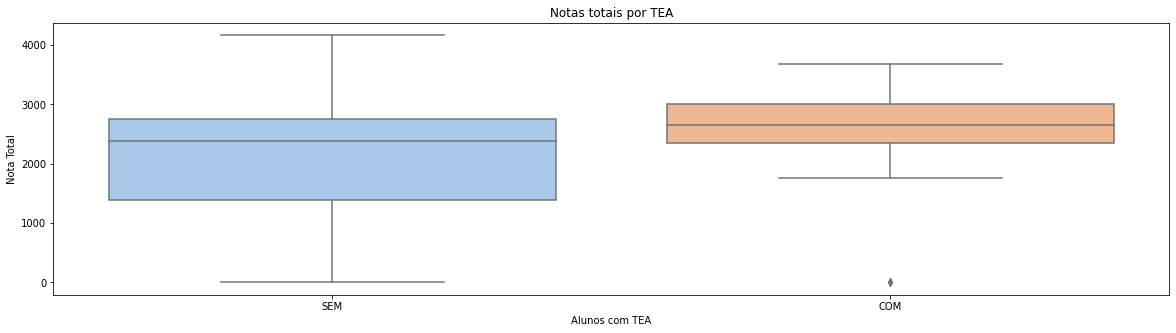

In [ ]:
dados['TXT_AUTISMO']=pd.cut(
   dados['IN_AUTISMO'],
   bins=[-1, 0, 1],
   labels=['SEM', 'COM']
)

plt.figure(figsize=(20, 5))

sns.boxplot(x="TXT_AUTISMO", y="NU_NOTA_TOTAL", data = dados, palette="pastel")


plt.xlabel("Alunos com TEA")
plt.ylabel("Nota Total")
plt.title("Notas totais por TEA")

Text(0.5, 1.0, 'Notas totais por TEA e Gênero')

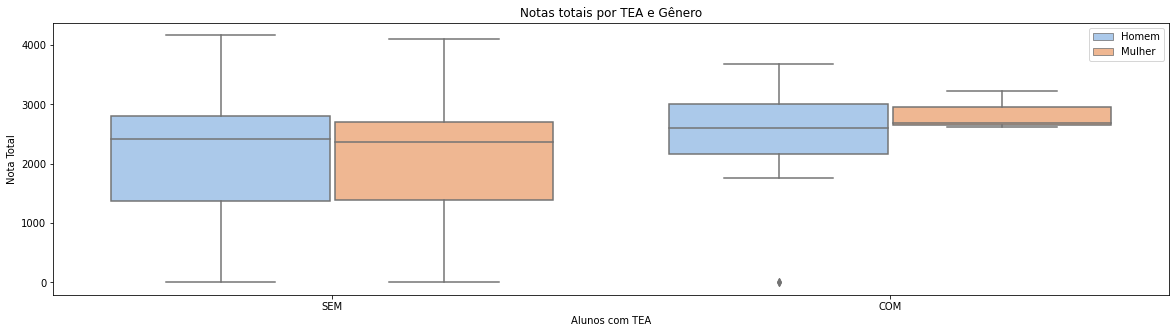

In [ ]:
dados['TXT_AUTISMO']=pd.cut(
   dados['IN_AUTISMO'],
   bins=[-1, 0, 1],
   labels=['SEM', 'COM']
)

plt.figure(figsize=(20, 5))

sns.boxplot(x="TXT_AUTISMO", y="NU_NOTA_TOTAL", data = dados, hue="TP_SEXO", palette="pastel")


plt.xlabel("Alunos com TEA")
plt.ylabel("Nota Total")
L=plt.legend()
L.get_texts()[0].set_text('Homem')
L.get_texts()[1].set_text('Mulher')
plt.title("Notas totais por TEA e Gênero")

No handles with labels found to put in legend.


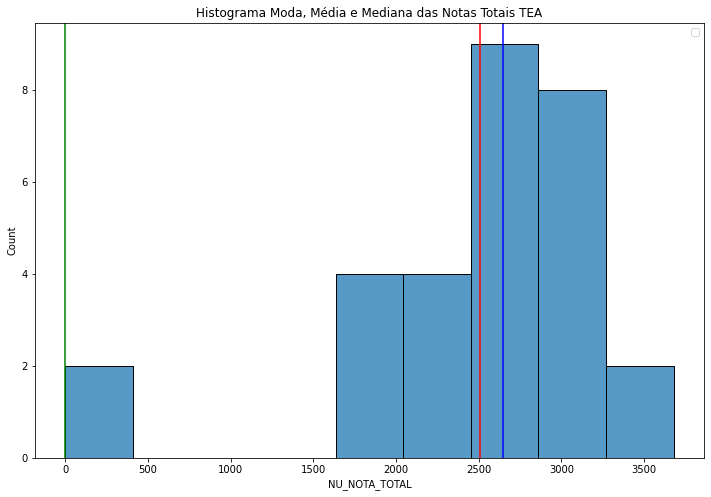

In [ ]:
plt.figure(figsize=(12,8))
media = dados.query("IN_AUTISMO == 1")["NU_NOTA_TOTAL"].mean()
moda = dados.query("IN_AUTISMO == 1")["NU_NOTA_TOTAL"].mode()[0]
mediana = dados.query("IN_AUTISMO == 1")["NU_NOTA_TOTAL"].median()
ax = sns.histplot(dados.query("IN_AUTISMO == 1"), x = "NU_NOTA_TOTAL", palette="pastel")
plt.axvline(media, c='r') 
plt.axvline(moda, c='g') 
plt.axvline(mediana, c='b') 
plt.title("Histograma Moda, Média e Mediana das Notas Totais TEA")
plt.legend()

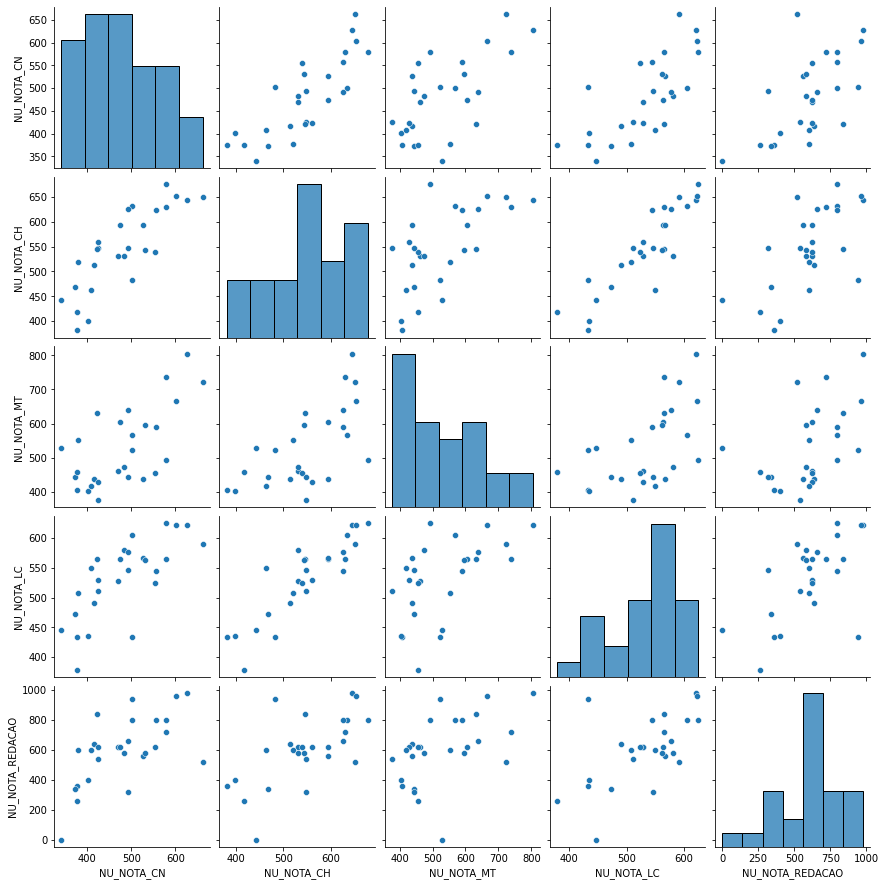

In [ ]:
sns.pairplot(dados.query("IN_AUTISMO == 1")[provas])

Text(0.5, 1.0, 'Correlação das notas TEA')

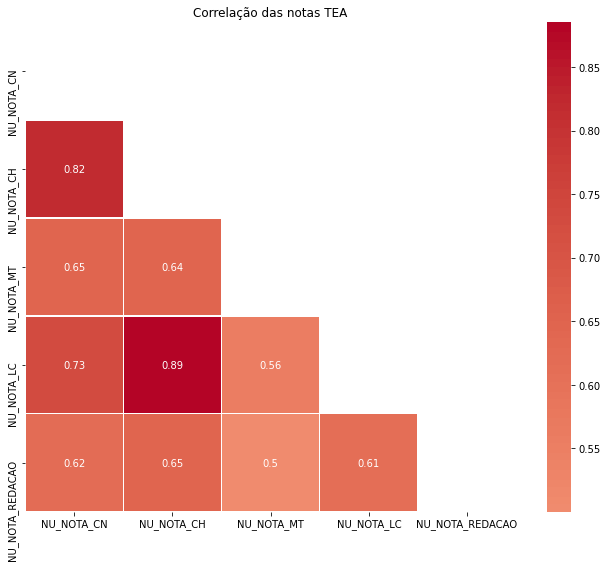

In [ ]:
#matriz
correlacao = dados.query("IN_AUTISMO == 1")[provas].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlacao, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlacao, mask=mask, cmap='coolwarm', annot=True, center=0, linewidths=.5)
plt.title("Correlação das notas TEA")

##Qual a cor/raça dos candidatos com TEA?

**Os candidatos de cor/raça branca são os que mais portam TEA.**

In [ ]:
renomear = {0 : 'Não declarado', 
            1 : 'Branca', 
            2 : 'Preta', 
            3 : 'Parda', 
            4 : 'Amarela', 
            5 : 'Indígena'}

autistas = dados[dados['IN_AUTISMO'] == 1]

autistas['TP_COR_RACA'].value_counts().rename(index = renomear).sort_index().rename_axis(['IN_AUTISMO']).reset_index(name = 'Total')

,IN_AUTISMO,Total
0,Branca,16
1,Não declarado,1
2,Parda,7
3,Preta,5


Text(0.5, 1.0, 'Cor/raça dos candidatos com TEA')

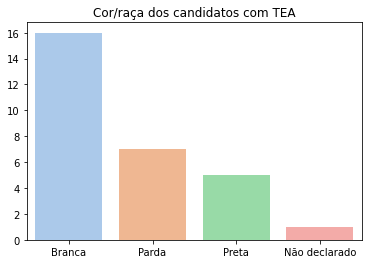

In [ ]:
sns.barplot(x=['Branca', 'Parda', 'Preta', 'Não declarado'], y=[16, 7, 5, 1], palette="pastel")
plt.title("Cor/raça dos candidatos com TEA")

##Onde moram os candidatos com TEA?

A maior parte vive na **região sudeste**, especificamente **Minas Gerais e São Paulo.**

*Vale ressaltar que MG e SP são os maiores estados da região.*

In [ ]:
dados.query("IN_AUTISMO == 1")["SG_UF_RESIDENCIA"].value_counts()

MG    9
SP    5
PI    2
DF    1
RN    1
CE    1
PA    1
RJ    1
BA    1
AL    1
MS    1
PR    1
ES    1
GO    1
RS    1
PB    1
Name: SG_UF_RESIDENCIA, dtype: int64

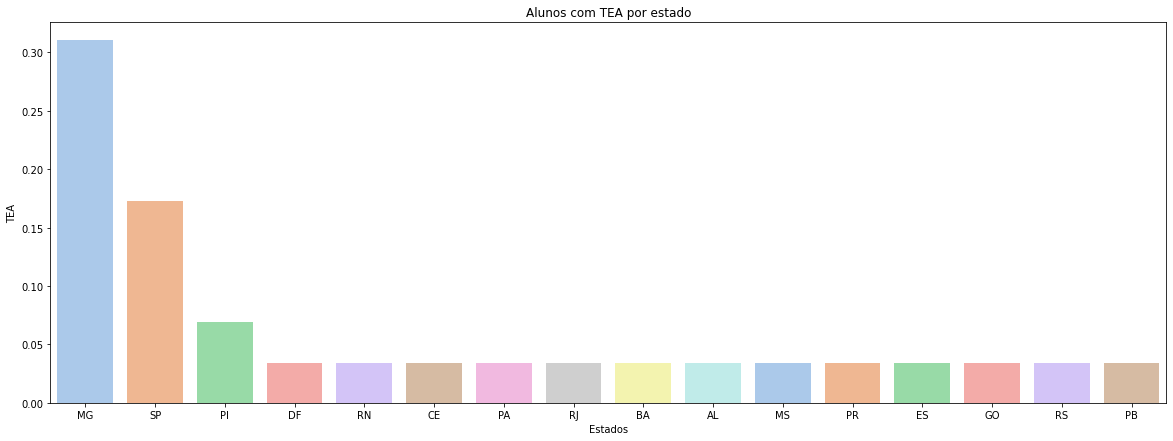

In [ ]:
labels = tea["SG_UF_RESIDENCIA"].value_counts(normalize=True).index
sizess = tea["SG_UF_RESIDENCIA"].value_counts(normalize=True).values
plt.figure(figsize=(20,7))
sns.barplot(x=labels, y=sizess, data = dados, palette="pastel")
plt.xlabel("Estados")
plt.ylabel("TEA")
plt.title("Alunos com TEA por estado")
plt.show()

##Quantos anos têm os candidatos com TEA?

O maior número de candidatos com TEA tem **a faixa etária de 17 a 19 anos.**

In [ ]:
dados.query("IN_AUTISMO == 1")["NU_IDADE"].value_counts()

18    6
19    5
17    5
26    2
22    2
20    2
31    1
25    1
23    1
21    1
16    1
44    1
35    1
Name: NU_IDADE, dtype: int64

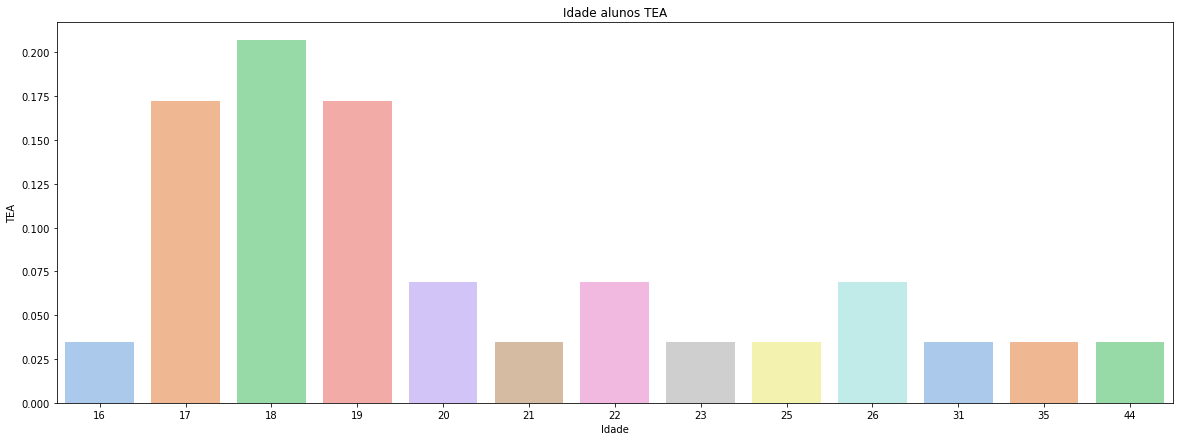

In [ ]:
l = tea["NU_IDADE"].value_counts(normalize=True).index
s = tea["NU_IDADE"].value_counts(normalize=True).values

plt.figure(figsize=(20,7))
sns.barplot(x=l, y=s, data = dados, palette="pastel")
plt.xlabel("Idade")
plt.ylabel("TEA")
plt.title("Idade alunos TEA")
plt.show()

##Qual a renda familiar dos candidatos com TEA?

*   **A maior concentração** de candidados com TEA possui a renda familiar de **1.497,01 até 1.996,00 reais**.
*   **Cerca de 40%** de candidatos com TEA possui renda familiar **a partir de R$ 3.992,01.**
*   Os candidatos que possuem **menor quantidade de renda familiar** representam **10%.**





In [ ]:
dados.query("IN_AUTISMO == 1")["Q006"].value_counts()

D    6
C    5
B    3
G    3
M    2
F    2
N    2
I    2
Q    1
E    1
J    1
P    1
Name: Q006, dtype: int64

Text(0.5, 1.0, 'TEA por Renda')

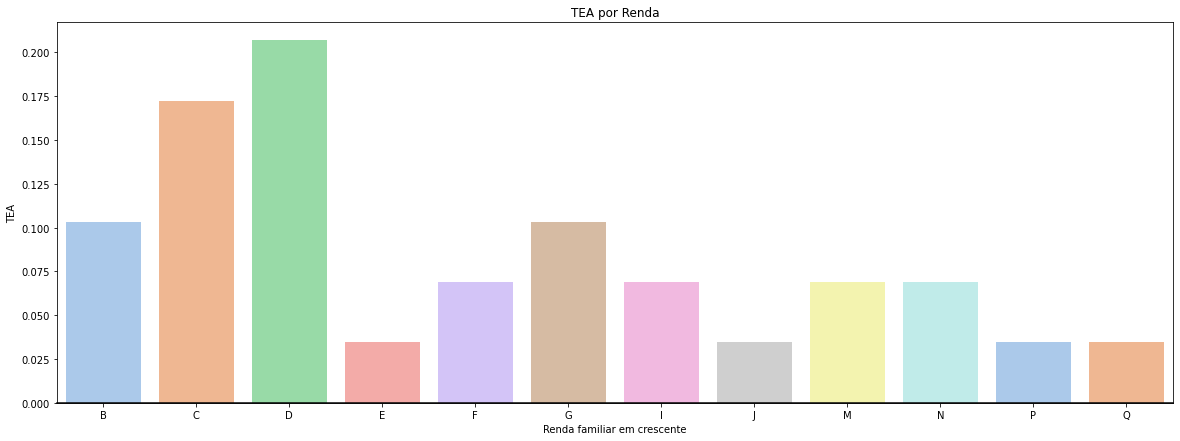

In [ ]:
autistas = dados[dados['IN_AUTISMO'] == 1]

total_tea_renda = autistas['Q006'].value_counts(normalize=True).sort_index().rename_axis(['Q006']).reset_index(name='Total')

total_tea_renda.sort_values(by = ['Q006'], inplace = True)

f, ax1 = plt.subplots(1, 1, figsize=(20,7), sharex=True)
sns.barplot(data = total_tea_renda, x='Q006', y='Total', palette="pastel", ax = ax1)
plt.xlabel("Renda familiar em crescente")
plt.ylabel("TEA")
ax1.axhline(0, color="k", clip_on=False)
plt.title("TEA por Renda")


##Qual o gênero dos candidatos com TEA?

Cerca de **90%** dos candidatos com TEA são **homens**.

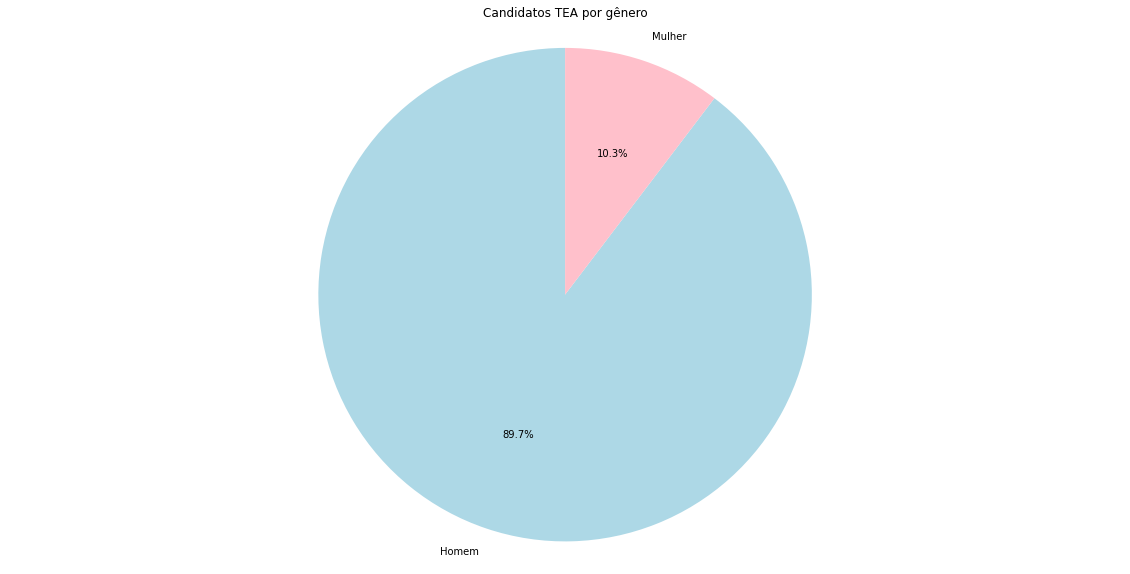

In [ ]:
l = tea["TP_SEXO"].value_counts(normalize=True).index
s = tea["TP_SEXO"].value_counts(normalize=True).values

fig1, ax1 = plt.subplots(figsize=(20, 10))
ax1.pie(s, labels=['Homem', 'Mulher'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])

ax1.axis('equal') 

plt.title("Candidatos TEA por gênero")
plt.show()

##Sabia que existe um padrão de gênero que podem prever o TEA?

Um estudo da Escola de Medicina da Universidade de Harvard descobriu que o gênero do primogênito diagnosticado com autismo de alguma forma se traduz em uma maior ou menor chance de que seu irmão ou irmã também tenha algum transtorno do tipo.

Os cálculos mostraram que os pares menina-menino são os que apresentam maior risco de recorrência do transtorno, com 16,7% do filho mais novo ser autista se sua irmã mais velha é. Em seguida vêm os pares menino-menino, com 12,9%, depois os menina-menina, com 7,6% e, por último, os menino-menino, com 4,2%. 

Text(0.5, 1.0, 'Risco de TEA em pares de irmaos por gênero')

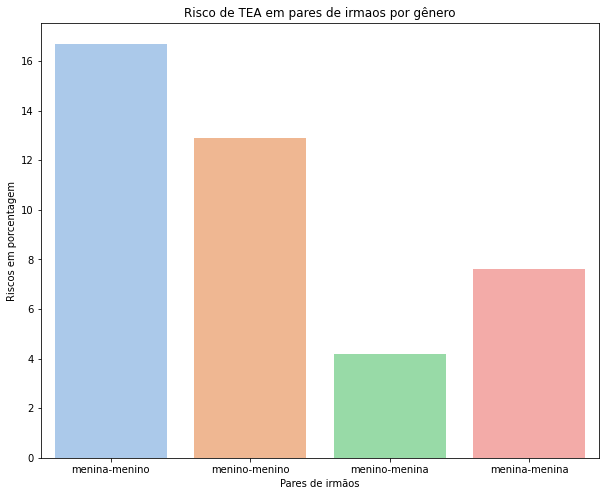

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=['menina-menino', 'menino-menino', 'menino-menina', 'menina-menina'], y=[16.7, 12.9, 4.2, 7.6] , palette="pastel")
plt.xlabel("Pares de irmãos")
plt.ylabel("Riscos em porcentagem")
plt.title("Risco de TEA em pares de irmaos por gênero")

"Os pesquisadores alertam, no entanto, que como este estudo também é observacional não é possível identificar qualquer tipo de causalidade para a ocorrência do distúrbio e que, apesar dos riscos, ele ainda é relativamente raro mesmo nas famílias com histórico da doença.

Fonte: http://apaebrasil.org.br/noticia/estudo-identifica-padroes-de-genero-na-recorrencia-de-autismo-entre-irmaos

##A grande diferença em gênero é um fator biológico ou social?

**Fator biológico**

"Segundo pesquisa, **o sexo feminino precisa de mutações genéticas mais extremas** do que o masculino **para o desenvolvimento de distúrbios neurológicos.** **Homens são mais vulneráveis a desordens neurológicas** como o autismo do que mulheres, *mas os cientistas ainda não sabem a causa dessa discrepância.*"

Fonte: https://veja.abril.com.br/saude/estudo-explica-por-que-autismo-e-mais-comum-em-homens-do-que-em-mulheres/#:~:text=Segundo%20pesquisa%2C%20o%20sexo%20feminino,o%20desenvolvimento%20de%20dist%C3%BArbios%20neurol%C3%B3gicos&text=Homens%20s%C3%A3o%20mais%20vulner%C3%A1veis%20a,sabem%20a%20causa%20dessa%20discrep%C3%A2ncia.

**Fator social**

***Um psicólogo clínico de Londres, William Mandy, observou que o TEA se apresenta de maneiras diferentes para homens e mulheres, fazendo com que as mulheres se camuflem apenas como pessoas tímidas o que levam a não procurar o diagnóstico.***


"A grande maioria das mulheres diagnosticadas tardiamente diz que não ter sabido anteriormente sobre seu autismo provoca sofrimento. Em um pequeno estudo de 2016, Mandy e seus colaboradores entrevistaram 14 mulheres jovens não diagnosticadas com autismo até o final da adolescência ou a idade adulta. Muitas descreveram experiências de abuso sexual. Também disseram que, se sua condição fosse conhecida, teriam sido menos incompreendidas e alienadas na escola. Também poderiam ter recebido o suporte necessário mais cedo."

Recomendo a leitura completa da fonte: https://progene.ib.usp.br/autismo-em-mulheres-os-custos-da-camuflagem-do-autismo/#:~:text=A%20grande%20maioria%20das%20mulheres,adolesc%C3%AAncia%20ou%20a%20idade%20adulta.

##Conclusão

Apesar do número pequeno em comparação aos demais candidatos, a inclusão dos portantes de TEA está aumentando no Brasil e é nítido. 

[Nesse ENEM (2019) mais de 50 mil provas foram adaptadas para candidatos com condições especiais.](https://vestibular.brasilescola.uol.com.br/enem/enem-2019-provas-adaptadas-serao-aplicadas-para-mais-50-mil/346134.html) Vemos o resultado positivo disso nas notas, como foram capaz de se igualar aos demais.

Apesar dos poucos dados no Brasil, estima-se que 1% da população tenham TEA, temos cerca de 0,02% de candidados com TEA no ENEM 2019. Por mais que sejam números pequenos eles representam uma boa proporção ao pensar que é nessário filtrar o número de cidadãos para a faixa etária mais comum pro concurso (17 a 19).



Text(0.5, 1.0, 'Proporção TEA Brasil x ENEM')

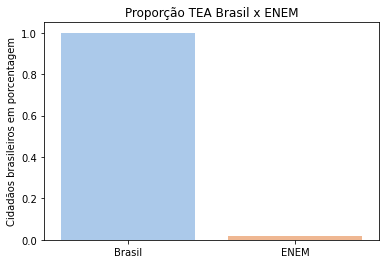

In [ ]:
sns.barplot(x=['Brasil', 'ENEM'], y=[1, 0.02], palette="pastel")
plt.ylabel("Cidadãos brasileiros em porcentagem")
plt.title("Proporção TEA Brasil x ENEM")

Como mostrado anteriormente, cerca de 90% são não treineiros, ou seja, **os candidatos de TEA estão se incluindo na educação e querendo entrar na faculdade.** Em 2018, 105.842 alunos estavam matriculados no ensino regular, **os candidatos de 2019 representam cerca de 0,027%** desse número.

Text(0.5, 1.0, 'Proporção TEA Brasil x ENEM')

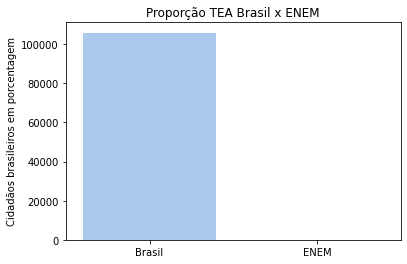

In [ ]:
sns.barplot(x=['Brasil', 'ENEM'], y=[105842, 0.027], palette="pastel")
plt.ylabel("Cidadãos brasileiros em porcentagem")
plt.title("Proporção TEA Brasil x ENEM")

**Por fim, concluimos que os portadores de TEA são tão capazes quanto qualquer um, e o ENEM está fazendo um bom trabalho de inclusão e equidade aos espeicais.** 

##Solução

**Não basta garantir a presença desses alunos em sala de aula. Inclusão envolve também adaptar conteúdos, formar professores e desenvolver atividades e avaliações que considerem as características de cada estudante.**

**Capacitar**

**É necessário cada vez mais capacitar profissionais da educação para a integração do aluno com TEA.** Como já vimos anteriormente, os números estão aumentando nas escolas regulares e isso é muito positivo para o desenvolvimento dos que possuem essa condição.

**Integrar**

Além da preparação dos professores, **a escola tem que proporcionar o envolvimento de todos os alunos**, o estudo e a celebração da diversidade, os currículos, métodos e materiais com adaptações para as necessidades especiais, parceria ativa com os pais e suporte suficiente para estudantes e equipe da escola. (SASSAKI, 2003).

**O TEA e a Pandemia**

**As mudanças na rotina impostas pela pandemia do novo coronavírus é um desafio para crianças com TEA**, com o fechamento de escolas, isolamento social, entre outras alterações no cotidiano.

É preciso ser franco com a criança e explicar bem sobre a mudança de rotina. Além disso, é recomendados que os familiares usem estratégias como fotos, figuras e vídeos para facilitar o engajamento no dessas crianças a conversas sobre o contexto atual e mudanças na rotina.

**Precisamos falar sobre Transtorno do Espectro Autista!**

É completamente necessário falar do assunto, são cerca de dois milhões de brasileiros que convivem com o TEA, não dá mais para ser adiado. É preciso discutir, refletir, se informar sobre! Eles existem e precisam ser vistos.